## Time-series Analysis & Stationarity Check

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [3]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [4]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [5]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
506,Яйца,Хозяйства населения,РЕСПУБЛИКА КАЗАХСТАН,49281.9,47440.1,95545.4,109694.4,163593.5,159493.9,159493.9,...,50383.9,59792.2,72390.7,93601.4,89681.5,77493.7,66982,46729.6,39443.6,41310.7
327,Верблюды,Хозяйства населения,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,...,12.1,NaN,NaN,26.3,NaN,2.2,0.4,NaN,1.4,1.2
79,Овцы и козы,Сельхозпредприятия,СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,2.1,11.71,2.42,2.48,3.62,4.09,7.69,...,26.52,8.16,15.35,26.12,36.29,14.59,20.76,21.07,37.75,24.1
323,Верблюды,Хозяйства населения,ГАСТАНА,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,Молоко,Крестьянские или фермерские хозяйства,ПАВЛОДАРСКАЯ ОБЛАСТЬ,2100.1,2387.5,3868.1,4658,7790.8,7864.7,7864.7,...,4123.6,4826.5,5625.3,7277.8,7401.2,6466.6,5193.3,4222.2,3343.5,4066.7


In [6]:
df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', '    АКМОЛИНСКАЯ ОБЛАСТЬ',
       '    АКТЮБИНСКАЯ ОБЛАСТЬ', '    АЛМАТИНСКАЯ ОБЛАСТЬ',
       '    АТЫРАУСКАЯ ОБЛАСТЬ', '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ЖАМБЫЛСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАСТАНА', '    ГАЛМАТЫ',
       '    ГШЫМКЕНТ', '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ ЖЕТІСУ',
       '    ОБЛАСТЬ ҰЛЫТАУ', '    ОБЛАСТЬ АБАЙ'], dtype=object)

In [7]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ', 'ГОРОД ШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ'], dtype=object)

In [8]:
# Filter the df
df = df[df['Показатель'] == "Молоко"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
442,Молоко,Хозяйства населения,АКТЮБИНСКАЯ ОБЛАСТЬ,3669.3,11753.6,23028.5,19272.7,46833.7,30616,30616,...,11129.9,9273.1,12099.4,21576.8,15821.4,12603.7,11862.2,9862.5,8466.7,7382.7
434,Молоко,Крестьянские или фермерские хозяйства,ГОРОД АЛМАТЫ,8.1,6.8,256.7,112.5,13.5,13,13,...,0,0,0,0,0,0,0,0,0,0
414,Молоко,Сельхозпредприятия,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,...,7676.2,7897.5,8493.2,10207.6,10130.2,10346.6,10666.3,10930.9,10655.9,10592.8
400,Молоко,Сельхозпредприятия,АТЫРАУСКАЯ ОБЛАСТЬ,116.2,118.4,124.2,96.2,149.1,118.2,118.2,...,259.1,252.4,253.2,249,247.3,254.2,236.8,233,228.8,189.5
433,Молоко,Крестьянские или фермерские хозяйства,ГОРОД АСТАНА,6.7,7.7,12.3,10.4,12.5,18.6,18.6,...,3.6,7.2,7.2,0,0,0,0,0,0,0


In [9]:
# Sum only the last two columns, grouped by "Регион"
df_sum = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df_sum


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,12800.2,15349.3,25086.1,31661.4,49129.8,40606.1,40606.1,36148.2,35619.1,...,17387.5,20221.1,24058.8,28277.0,26267.7,22673.0,22635.3,18373.4,15949.9,16241.4
1,АКТЮБИНСКАЯ ОБЛАСТЬ,4854.4,13789.3,26250.2,22545.1,51241.8,35868,35868,29740.5,30153.6,...,14235.9,12247.2,15024.9,26224.1,22111.2,19708.6,18126.4,14585.2,12179.5,10873.8
2,АЛМАТИНСКАЯ ОБЛАСТЬ,44442.1,38614.3,50253.8,56877.9,73872.6,69666.5,69666.5,69978.2,73636.5,...,18596.8,19186.9,22461.3,32608.5,29724.3,32883.5,32588.5,30090.5,22030.8,15652.0
3,АТЫРАУСКАЯ ОБЛАСТЬ,2093.2,2274.2,3418.8,5912.4,6679.5,5287.3,5287.3,5539.6,5783.3,...,1759.6,2706.1,5069.0,3739.6,2804.7,3263.7,3272.5,1500.4,2262.7,2702.3
4,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,30300.3,37867.1,53846.5,65609.0,103252.2,96698.6,96698.6,87875.9,76324.0,...,14881.1,18177.3,19851.9,26546.0,26667.5,25528.8,21278.6,19066.4,19393.8,25435.0
5,ГОРОД АЛМАТЫ,315.1,253.9,476.0,594.9,272.9,317,317,325.0,336.9,...,16.1,28.6,29.1,27.3,28.4,27.5,22.9,28.7,28.2,38.6
6,ГОРОД АСТАНА,34.8,34.6,42.7,47.2,55.4,71.1,71.1,66,32.1,...,11.3,20.9,19.9,18,25.1,25,17.4,12.4,6.6,0.2
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,4638.7,6160.3,7165.8,8386.7,7373.9,6371.8,5602.1,5910.7,5144.2,5378.8
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,14848.0,14639.9,15844.1,25219.9,37200.8,28958.5,28958.5,31406.2,32281.7,...,12628.7,19916.2,21610.9,28942.5,22208.3,24907.0,24341.0,15457.5,14452.4,18270.8
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,3611.2,6283.7,9171.8,18468.2,40125.2,27562.6,27562.6,24379.5,23077.8,...,8738.0,18832.4,34459.1,39307.0,27028.6,20199.8,19579.4,11174.1,9415.9,9712.4


In [10]:
# convert date columns to datetime format
df_sum.columns = list(df_sum.columns[:1]) + list(pd.to_datetime(df_sum.columns[-120:]))
df_sum = df_sum.rename(columns={col: col.strftime("%Y-%m-%d") for col in df_sum.columns[-120:]})
df_sum.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
15,ОБЛАСТЬ ЖЕТІСУ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,16418.1,19752.3,18536.1,25872.9,21118.6,20792.5,25258.8,18643.5,15494.9,14631.7
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,14848.0,14639.9,15844.1,25219.9,37200.8,28958.5,28958.5,31406.2,32281.7,...,12628.7,19916.2,21610.9,28942.5,22208.3,24907.0,24341.0,15457.5,14452.4,18270.8
21,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,38911.1,42560.2,54997.1,65473.7,82856.4,71519.2,71519.2,62838.6,55599.8,...,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет
11,КОСТАНАЙСКАЯ ОБЛАСТЬ,17605.7,22901.4,22890.2,43794.5,91658.2,45882.8,45882.8,21738.4,20837.3,...,13867.7,22759.5,22176.5,43579.6,23723.6,13406.8,12774.7,11421.4,8236.4,9839.8
10,КАРАГАНДИНСКАЯ ОБЛАСТЬ,9281.2,15214.9,31818.5,29900.4,64324.9,45349.2,45349.2,37177.1,35967.7,...,16260.8,16243.8,24404.2,31986.3,22235.4,18272.4,23386.7,13690.0,12115.0,20918.7


C:\Users\Acer\AppData\Local\Temp\ipykernel_5164\1533245776.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sum.replace("нетнетнет", np.nan, inplace=True)


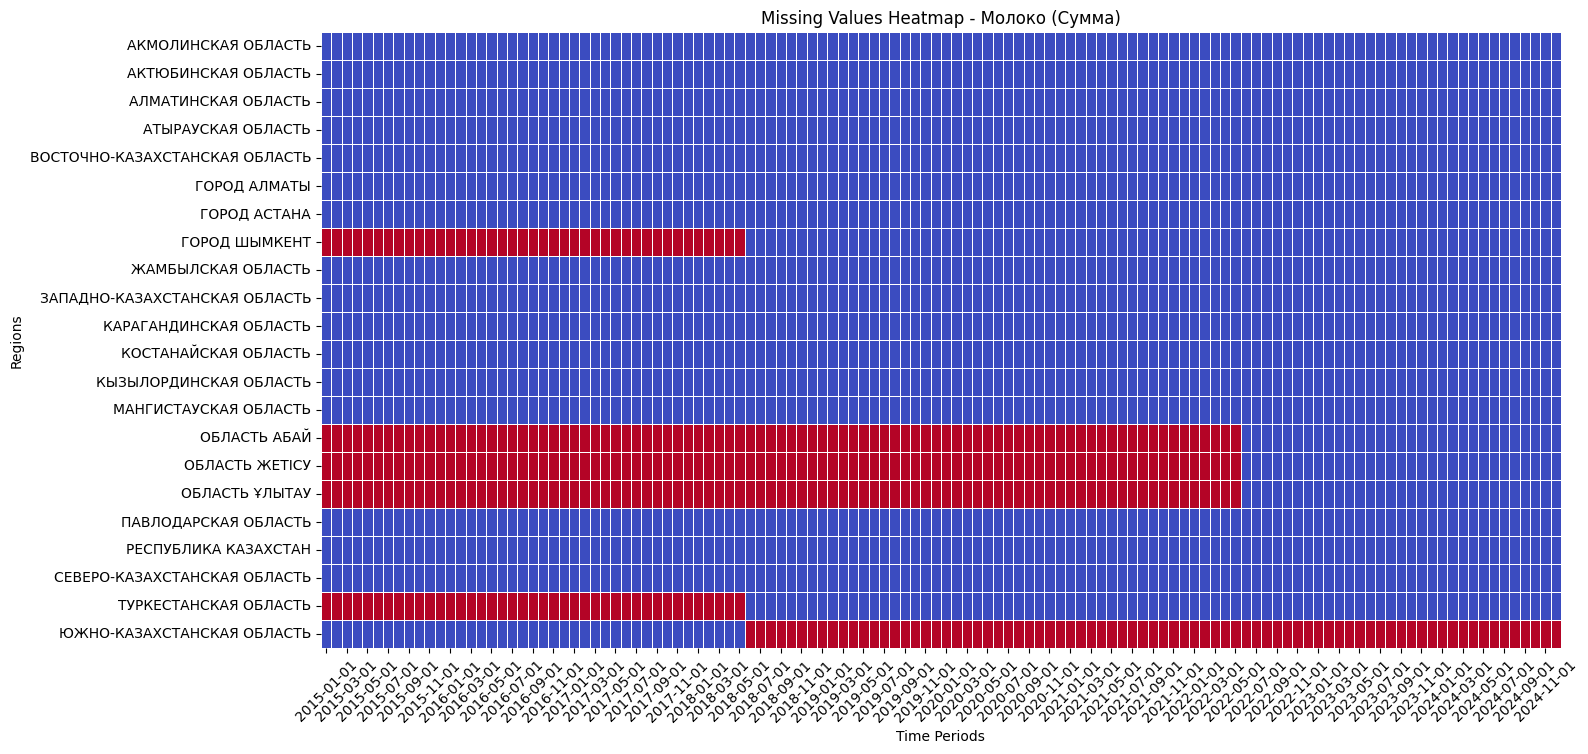

In [11]:
# Replace "нетнетнет" with NaN for easier handling
df_sum.replace("нетнетнет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_sum_numeric = df_sum.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_sum_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Молоко (Сумма)')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Convert from wide format to long format
df_sum_melted = df_sum.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_sum_melted.sample(5)

,Регион,Месяц,Объем
2285,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2023-08-01,42072.9
225,ГОРОД АЛМАТЫ,2015-11-01,516.9
2582,ЖАМБЫЛСКАЯ ОБЛАСТЬ,2024-10-01,15457.5
1853,ГОРОД АЛМАТЫ,2022-01-01,38.1
133,АКТЮБИНСКАЯ ОБЛАСТЬ,2015-07-01,35868.0


In [13]:
# Convert date column to datetime
df_sum_melted["Месяц"] = pd.to_datetime(df_sum_melted["Месяц"])

# Set index for time-series analysis
df_sum_melted = df_sum_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  12800.2
                           2015-02-01  15349.3
                           2015-03-01  25086.1
                           2015-04-01  31661.4
                           2015-05-01  49129.8
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [14]:
# Replace "нет" with NaN
df_sum_melted = df_sum_melted.replace("нетнетнет", np.nan)
df_sum_melted.isna().groupby("Регион").mean() * 100

,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


In [15]:
# Filter the df
df_shp = df[(df['Показатель'] == "Молоко") & (df['Категория хозяйства'] == "Сельхозпредприятия")]
df_shp = df_shp.drop(columns=["Показатель", "Категория хозяйства"])
df_shp = df_shp.sort_values(by="Регион", ascending=True)

df_shp.sample(5)


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
410,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,1462.7,1418.1,1694.4,1735.5,2147.9,2062.9,2062.9,1840.3,1593.7,...,2674.6,2532.1,2611.2,2509.3,2476.3,2470.8,2468.2,2469.9,2428,2547.7
402,ЖАМБЫЛСКАЯ ОБЛАСТЬ,232.3,337.4,380.6,529.4,577.6,423,423,544.5,506.5,...,290.6,302.4,344.9,379.8,332.2,296.2,295.2,274.8,274.3,261.6
400,АТЫРАУСКАЯ ОБЛАСТЬ,116.2,118.4,124.2,96.2,149.1,118.2,118.2,94.5,91.9,...,259.1,252.4,253.2,249,247.3,254.2,236.8,233,228.8,189.5
414,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,7676.2,7897.5,8493.2,10207.6,10130.2,10346.6,10666.3,10930.9,10655.9,10592.8
405,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,550.5,471.5,508,500.1,472.1,457.8,457.8,439.1,534.1,...,619.7,589.5,613.1,607.6,621.5,635.4,592.2,551.7,605.7,569.6


C:\Users\Acer\AppData\Local\Temp\ipykernel_5164\1095914944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shp.replace("нет", np.nan, inplace=True)


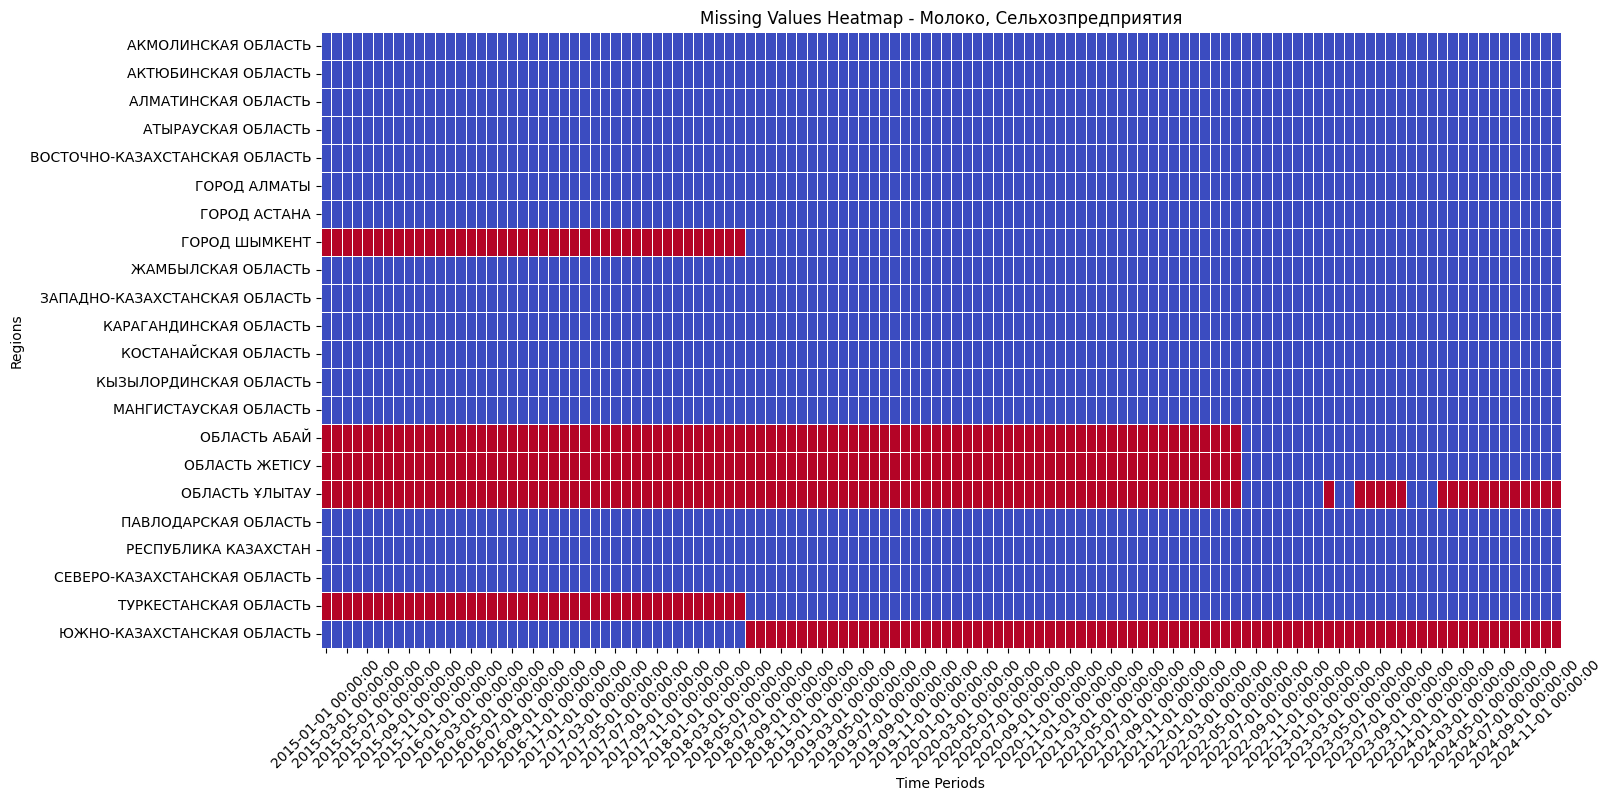

In [16]:
# Replace "нетнетнет" with NaN for easier handling
df_shp.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_shp_numeric = df_shp.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_shp_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Молоко, Сельхозпредприятия')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Filter the df
df_kfh = df[(df['Показатель'] == "Молоко") & (df['Категория хозяйства'] == "Крестьянские или фермерские хозяйства")]
df_kfh = df_kfh.drop(columns=["Показатель", "Категория хозяйства"])
df_kfh = df_kfh.sort_values(by="Регион", ascending=True)

df_kfh.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
425,КАРАГАНДИНСКАЯ ОБЛАСТЬ,3777.3,6679.7,13428.4,15714.1,19027,18811.4,18811.4,15289.2,13756.9,...,8301.2,9702.5,12330.7,11093.7,9605.2,8608,9664.1,4758.5,4460.9,8379.2
434,ГОРОД АЛМАТЫ,8.1,6.8,256.7,112.5,13.5,13,13,10.9,9.1,...,0,0,0,0,0,0,0,0,0,0
437,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,2278.4,2388.6,2995.7,4277.8,2408.5,1886.2,4681,4095,2189.5,4962
430,ПАВЛОДАРСКАЯ ОБЛАСТЬ,2100.1,2387.5,3868.1,4658,7790.8,7864.7,7864.7,7019.4,5465.9,...,4123.6,4826.5,5625.3,7277.8,7401.2,6466.6,5193.3,4222.2,3343.5,4066.7
423,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,628.7,986.4,1850.7,4641.1,10108.3,6762.8,6762.8,5592.7,5605.7,...,2411.7,6315.3,8755.5,10589.5,5833.2,2947,3371.7,2367.6,2344.8,1422.2


C:\Users\Acer\AppData\Local\Temp\ipykernel_5164\2530192070.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kfh.replace("нет", np.nan, inplace=True)


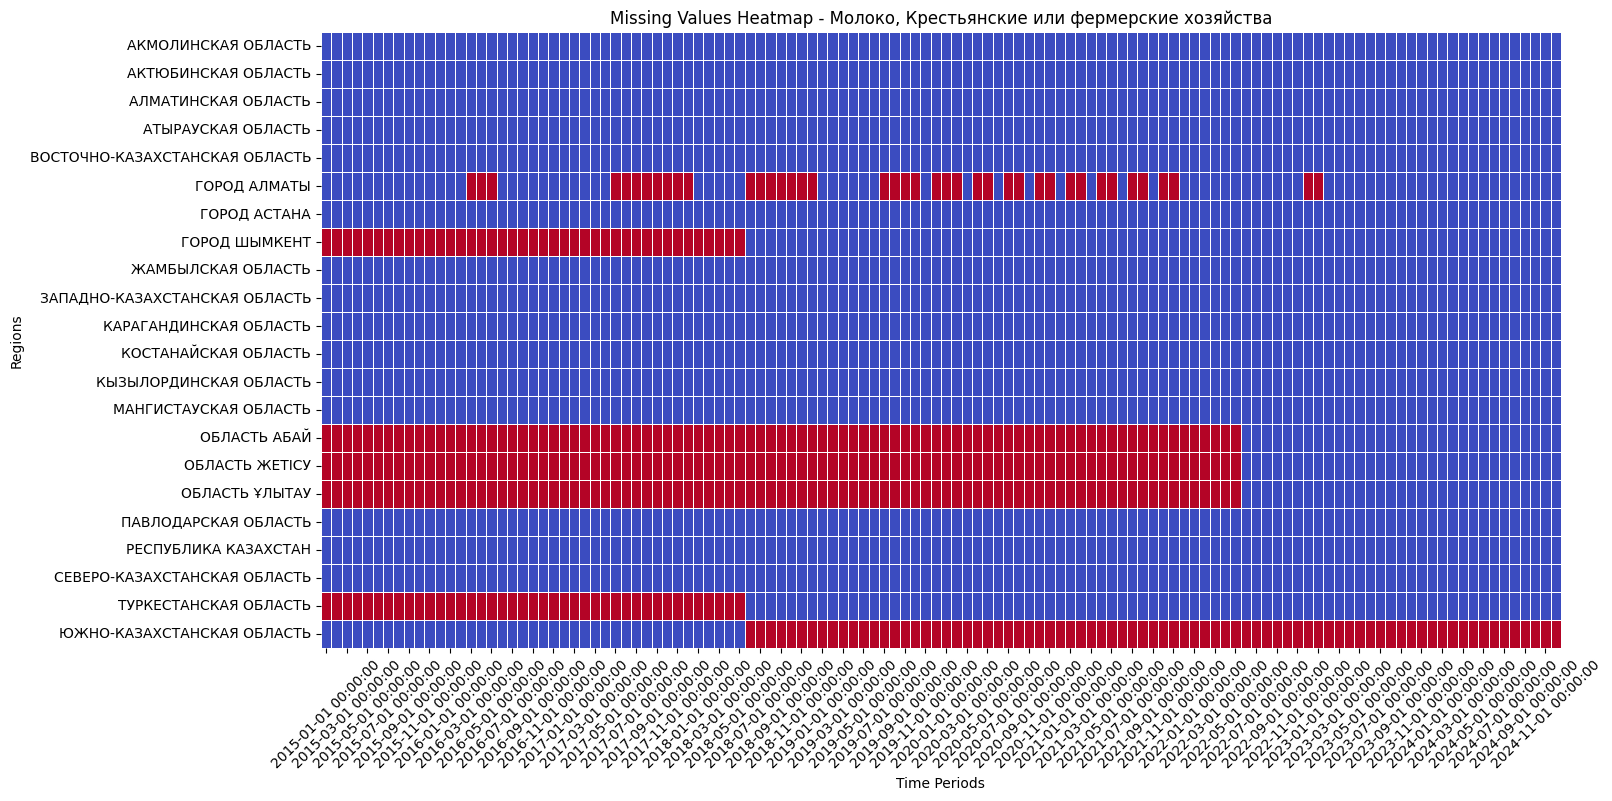

In [18]:
# Replace "нетнетнет" with NaN for easier handling
df_kfh.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_kfh_numeric = df_kfh.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_kfh_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Молоко, Крестьянские или фермерские хозяйства')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Filter the df
df_hn = df[(df['Показатель'] == "Молоко") & (df['Категория хозяйства'] == "Хозяйства населения")]
df_hn = df_hn.drop(columns=["Показатель", "Категория хозяйства"])
df_hn = df_hn.sort_values(by="Регион", ascending=True)

df_hn.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
459,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,12656.2,15820.8,13852.2,19860.7,16634.3,17364.2,19081.9,13002,11742,7920
447,КАРАГАНДИНСКАЯ ОБЛАСТЬ,5304,8301.4,18114,13909.4,44876.8,26152.4,26152.4,21536.1,21952.2,...,7593.9,6194.6,11693.9,20600.8,12337.2,9435.6,13566.4,8803.8,7529.6,12401.7
455,ГОРОД АСТАНА,24.6,26.9,30.4,36.8,42.9,52.5,52.5,50,23.2,...,7.7,13.7,12.7,18,25.1,25,17.4,12.4,6.6,0.2
453,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,10888,12335.1,14034,40252.5,52723,55116.3,55116.3,50232.8,47920.3,...,5746.1,14599.7,15780.1,19640.8,22177.1,19136.4,17165.2,9497.1,5305.2,6522.8
450,МАНГИСТАУСКАЯ ОБЛАСТЬ,68.1,80.3,86.6,92.9,593.5,454.4,454.4,402,349.6,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Acer\AppData\Local\Temp\ipykernel_5164\1061516178.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hn.replace("нет", np.nan, inplace=True)


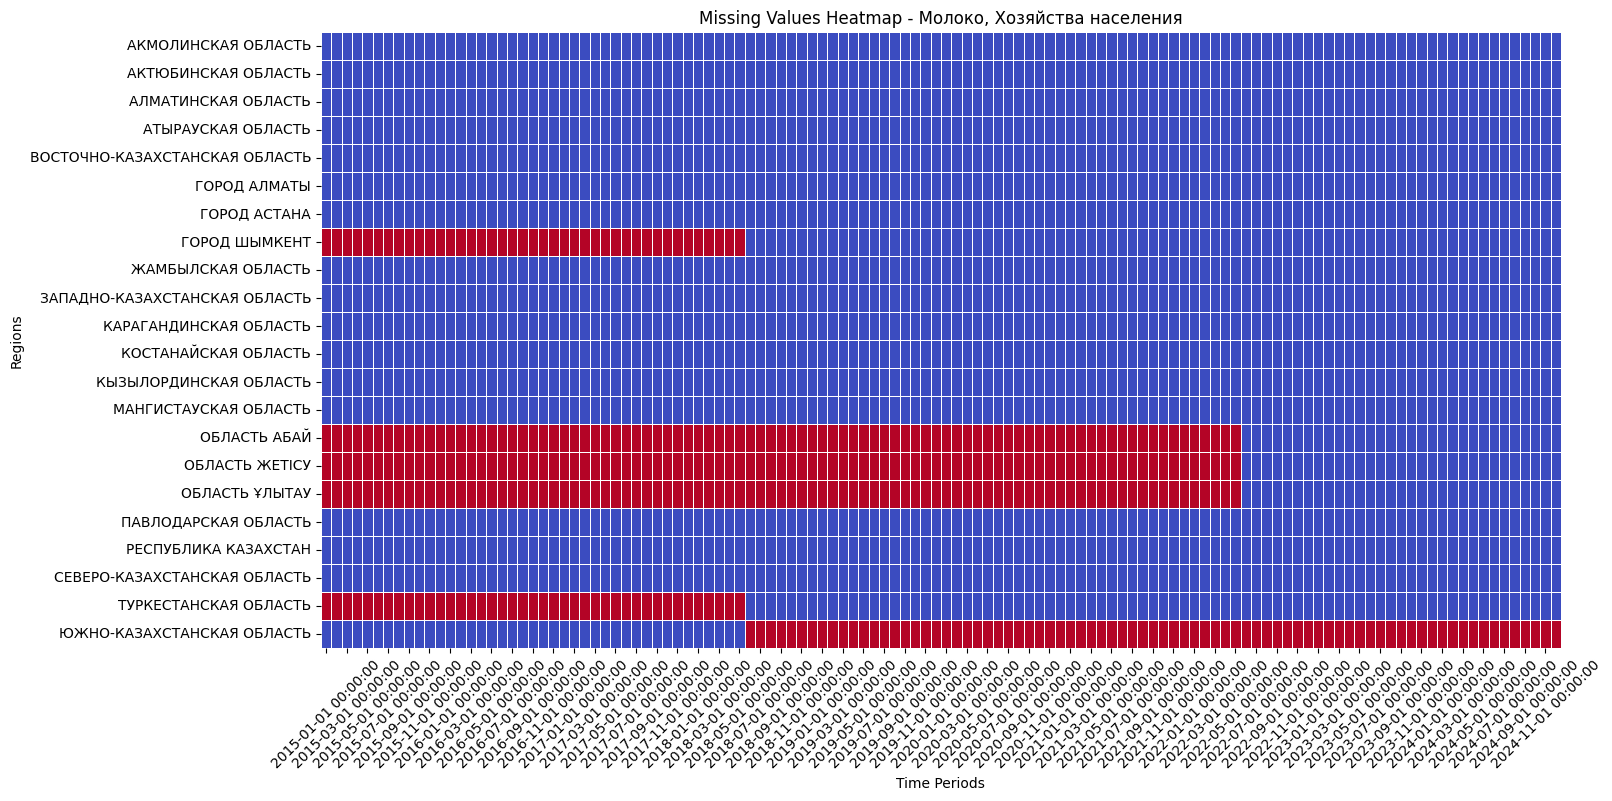

In [20]:
# Replace "нетнетнет" with NaN for easier handling
df_hn.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_hn_numeric = df_hn.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_hn_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Молоко, Хозяйства населения')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [21]:
df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  12800.2
                           2015-02-01  15349.3
                           2015-03-01  25086.1
                           2015-04-01  31661.4
                           2015-05-01  49129.8
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [22]:
# Reset index if needed
df_stats = df_sum_melted.reset_index()

# Calculate basic descriptive stats for each region
region_stats = df_stats.groupby("Регион")["Объем"].agg([
    "count", "min", "max", "mean", "median", "std"
]).rename(columns={
    "count": "Кол-во значений",
    "min": "Мин.",
    "max": "Макс.",
    "mean": "Среднее",
    "median": "Медиана",
    "std": "Ст. откл."
})

# Display result
display(region_stats.sort_values(by="Среднее", ascending=False))


,Кол-во значений,Мин.,Макс.,Среднее,Медиана,Ст. откл.
Регион,,,,,,
РЕСПУБЛИКА КАЗАХСТАН,120,147512.1,889209.1,440580.371667,388455.05,174208.703294
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120,10376.1,139071.3,62872.781667,61265.90,33238.873034
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,41,38911.1,85444.3,59354.524390,56652.20,14316.404506
АЛМАТИНСКАЯ ОБЛАСТЬ,120,9852.3,96430.6,54184.344167,56845.40,21268.062074
ТУРКЕСТАНСКАЯ ОБЛАСТЬ,79,22636.7,94516.4,54022.470886,48920.20,18637.626955
СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120,14116.8,88674.9,44229.644167,38782.90,22514.471330
КАРАГАНДИНСКАЯ ОБЛАСТЬ,120,4432.0,82670.9,34416.966667,35054.65,17792.901480
ОБЛАСТЬ АБАЙ,31,8699.6,80058.3,31445.306452,29353.60,17433.476082
КОСТАНАЙСКАЯ ОБЛАСТЬ,120,7998.6,106690.1,30420.620833,22895.80,22386.926355


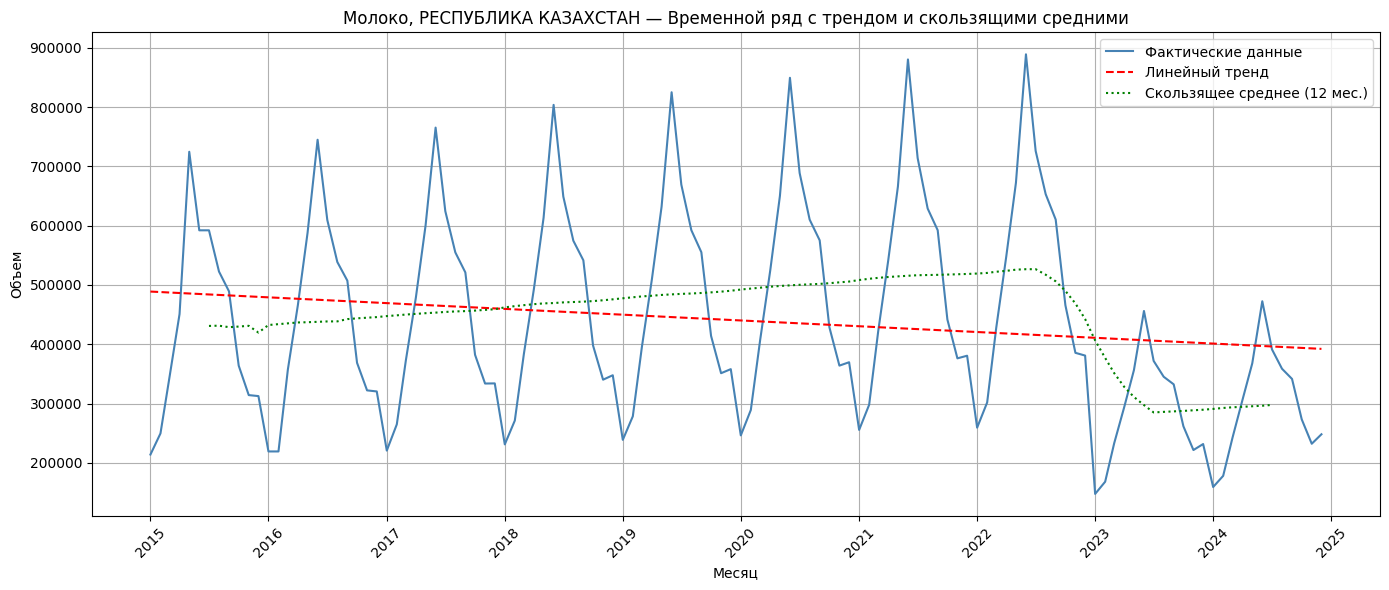

In [23]:
# Filter for national level
national_data = df_stats[df_stats["Регион"] == "РЕСПУБЛИКА КАЗАХСТАН"].copy()

# Ensure 'Месяц' is datetime
national_data["Месяц"] = pd.to_datetime(national_data["Месяц"])

# Create time index as integer (months since start)
national_data = national_data.sort_values("Месяц")
national_data["t"] = range(len(national_data))  # 0, 1, 2, ..., N

# Trend line
coeffs = np.polyfit(national_data["t"], national_data["Объем"], deg=1)
trend = np.poly1d(coeffs)

# Moving Averages
national_data["MA_12"] = national_data["Объем"].rolling(window=12, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))

# Actual data
plt.plot(national_data["Месяц"], national_data["Объем"], label="Фактические данные", color="steelblue")

# Trend line
plt.plot(national_data["Месяц"], trend(national_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# Moving Averages
plt.plot(national_data["Месяц"], national_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# Labels and style
plt.title("Молоко, РЕСПУБЛИКА КАЗАХСТАН — Временной ряд с трендом и скользящими средними")
plt.xlabel("Месяц")
plt.ylabel("Объем")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

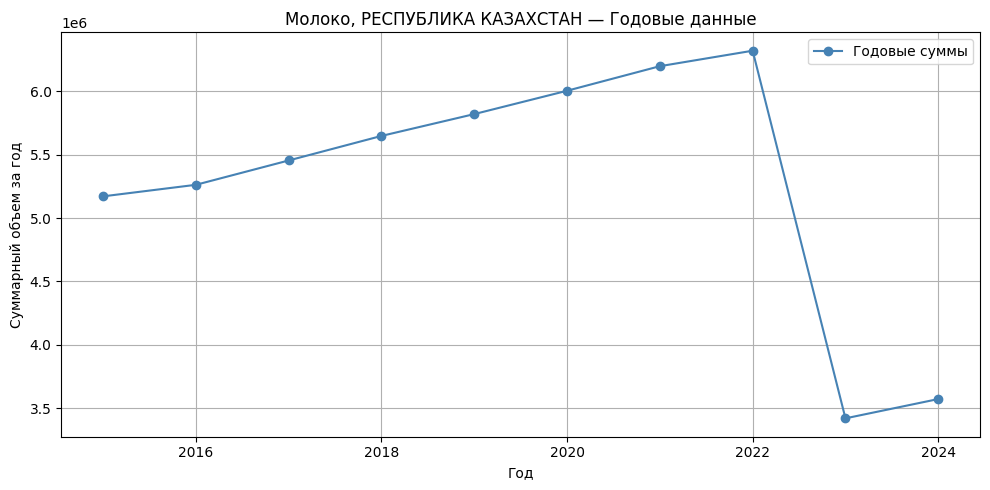

In [24]:
# Aggregate by year (sum)
national_data["Год"] = national_data["Месяц"].dt.year
annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Actual yearly data
plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# Labels and style
plt.title("Молоко, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные")
plt.xlabel("Год")
plt.ylabel("Суммарный объем за год")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# # Filter for national level
# aktobe_data = df_stats[df_stats["Регион"] == "АКТЮБИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# aktobe_data["Месяц"] = pd.to_datetime(aktobe_data["Месяц"])

# # Create time index as integer (months since start)
# aktobe_data = aktobe_data.sort_values("Месяц")
# aktobe_data["t"] = range(len(aktobe_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(aktobe_data["t"], aktobe_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# aktobe_data["MA_12"] = aktobe_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(aktobe_data["Месяц"], aktobe_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(aktobe_data["Месяц"], trend(aktobe_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(aktobe_data["Месяц"], aktobe_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКТЮБИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [25]:
# # Filter for national level
# akmola_data = df_stats[df_stats["Регион"] == "АКМОЛИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# akmola_data["Месяц"] = pd.to_datetime(akmola_data["Месяц"])

# # Create time index as integer (months since start)
# akmola_data = akmola_data.sort_values("Месяц")
# akmola_data["t"] = range(len(akmola_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(akmola_data["t"], akmola_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# akmola_data["MA_12"] = akmola_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(akmola_data["Месяц"], akmola_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(akmola_data["Месяц"], trend(akmola_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(akmola_data["Месяц"], akmola_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКМОЛИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [26]:
# # Filter for national level
# kyzylorda_data = df_stats[df_stats["Регион"] == "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# kyzylorda_data["Месяц"] = pd.to_datetime(kyzylorda_data["Месяц"])

# # Create time index as integer (months since start)
# kyzylorda_data = kyzylorda_data.sort_values("Месяц")
# kyzylorda_data["t"] = range(len(kyzylorda_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(kyzylorda_data["t"], kyzylorda_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# kyzylorda_data["MA_12"] = kyzylorda_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(kyzylorda_data["Месяц"], trend(kyzylorda_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()